# **Performing Gray Level Transformations for Image Enhancement**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
imgdir = "/content/drive/My Drive/Colab Notebooks/CSE_4106_Digital_Image_Processing/img"
!ls "{directory}"

files = os.listdir(imgdir)
print(files)

ls: cannot access '{directory}': No such file or directory
['High Contrast.PNG', 'Dark.PNG', 'lena_color.jpg', 'clock2.jpg', 'Bright.PNG', 'lenna.png', 'fingerprint.jpg', 'horse-dog.jpg', 'tagore.png', 'rgb.jpg', 'Low Contrast.PNG', 'Low Contrast - Shortcut.lnk', 'road.bmp']


Text(0.5, 1.0, 'Original Image')

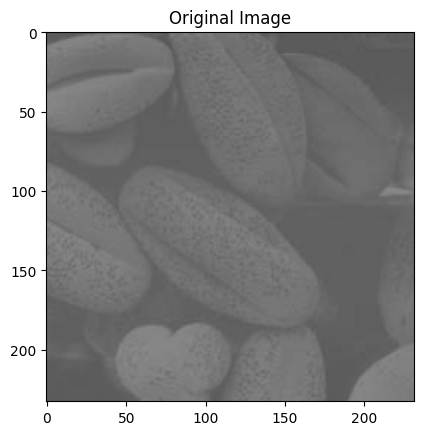

In [3]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
image = cv2.imread(imgdir+'/Low Contrast.PNG', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

**Image Negative**
* A negative of an image or inverted is computed using the following formula:<br>
    **s = (L – 1) – r**<br>
Where, r is the input image pixel, L is the highest value of the pixel and s is the resulting pixel.

In [4]:
# Negative Transformation Formula
negative = 255 - image

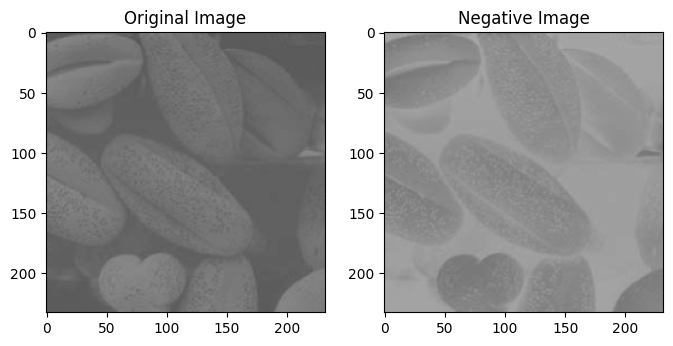

In [5]:
# Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(negative, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Negative Image')

### Image Negative Using For Loop

In [6]:
negative_image = np.zeros_like(image)

In [7]:
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    new_pixel = 255 - image[i,j]
    negative_image[i,j] = new_pixel

[[ 91  91  91 ...  92  94  94]
 [ 91  91  91 ...  91  92  92]
 [ 91  91  91 ...  93  92  92]
 ...
 [ 91  91  91 ... 122 122 121]
 [ 91  91  91 ... 122 122 121]
 [ 92  92  92 ... 122 122 121]]
[[164 164 164 ... 163 161 161]
 [164 164 164 ... 164 163 163]
 [164 164 164 ... 162 163 163]
 ...
 [164 164 164 ... 133 133 134]
 [164 164 164 ... 133 133 134]
 [163 163 163 ... 133 133 134]]


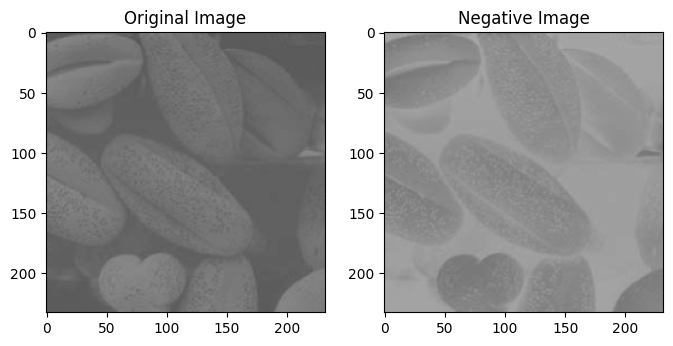

In [8]:
# Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(negative_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Negative Image')
print(image)
print(negative_image)

### Log Transformation
* During log transformation, the dark pixels in an image are expanded as compare to the higher pixel values.
The log transformation of an image is computed using the following formula:



*   **c=255/log(1+maximum intensity value)**
*   **s=c*log(1+r)**






r: original image value<br>
s: new pixel value


In [9]:
# Log Transformation
c = round(255 / np.log(1 + np.max(image)))
log_image = c * (np.log(1+image))
log_image = np.array(log_image, dtype = np.uint8)

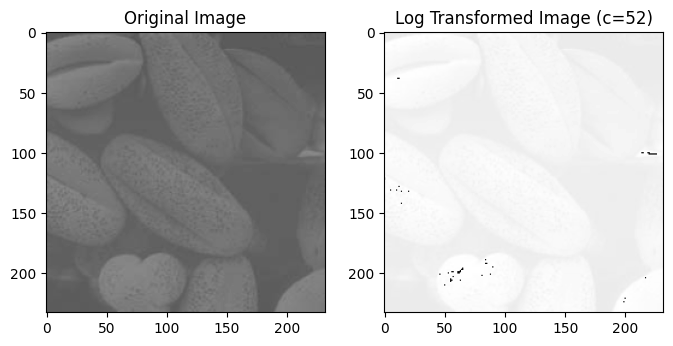

In [10]:
#Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(log_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text(f'Log Transformed Image (c={c})')
plt.show()

### Log Transformation Using For Loop

In [11]:
c = 255 / np.log(1 + np.max(image))
log_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
         new_pixel = c * np.log(1 + image[i,j])
         log_image[i,j] = new_pixel

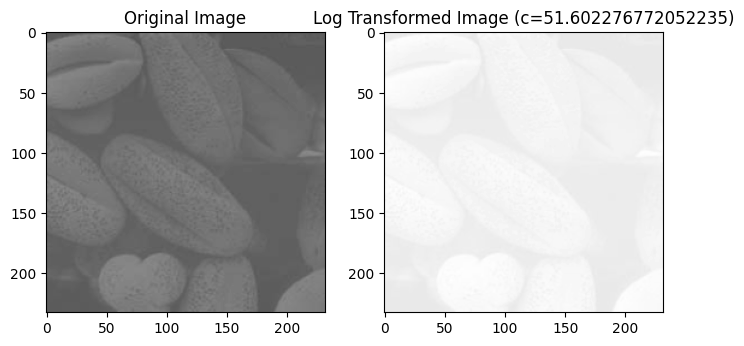

[[ 91  91  91 ...  92  94  94]
 [ 91  91  91 ...  91  92  92]
 [ 91  91  91 ...  93  92  92]
 ...
 [ 91  91  91 ... 122 122 121]
 [ 91  91  91 ... 122 122 121]
 [ 92  92  92 ... 122 122 121]]
[[233 233 233 ... 233 234 234]
 [233 233 233 ... 233 233 233]
 [233 233 233 ... 234 233 233]
 ...
 [233 233 233 ... 248 248 247]
 [233 233 233 ... 248 248 247]
 [233 233 233 ... 248 248 247]]


In [12]:
#Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(log_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text(f'Log Transformed Image (c={c})')
plt.show()
print(image)
print(log_image)

### Gamma Correction
* Gamma transformation or power law transformation involve nth power and nth root transformation.
* An image is gamma transformed using the following formula:
 **s = c * (r^γ)**
* Variation in the value of γ varies the enhancement of the images.
* This type of transformation is used for enhancing images for different type of display devices.

In [13]:
gamma_image = np.zeros_like(image)
gamma = 0.5
# gama = use 0.2, 1, 1.5 etc values and see changes
c = 255 / (255 ** gamma)
# Apply gamma correction using a for loop
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel_value = image[i,j]
        corrected_value = c * (pixel_value ** gamma)
        gamma_image[i,j] = corrected_value

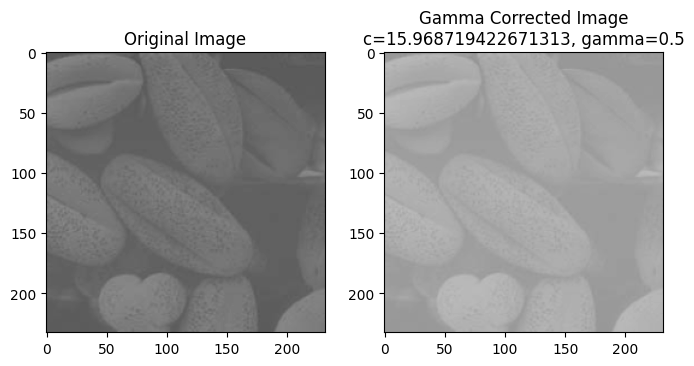

In [14]:
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image, cmap='gray',  vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(gamma_image, cmap='gray',  vmin=0, vmax=255)
ax2.title.set_text(f'Gamma Corrected Image\nc={c}, gamma={gamma}')
plt.show()

### Contrast Stretching
* Low contrast image occur often due to improper illumination or non-linearly or small dynamic range of an imaging sensor.
* It increases the dynamic range of grey levels in the image.
It has three cases:
1. **When r1 =s1 and r2=s2, transformation becomes a Linear function.**
2. **When r1=r2, s1=0 and s2=L-1, transformation becomes a thresholding function.**
3. **When (r1, s1) = (rmin, 0) and (r2, s2) = (rmax, L-1), this is known as Min-Max Stretching.**

### Image Thresholding

In [15]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
image = cv2.imread(imgdir+'/road.bmp', cv2.IMREAD_GRAYSCALE)
thresh_value = 128
# Create empty binary image
binary = np.zeros_like(image)
# Loop over each pixel in the image
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Apply thresholding
        if image[i,j] >= thresh_value:
            binary[i,j] = 255
        else:
            binary[i,j] = 0

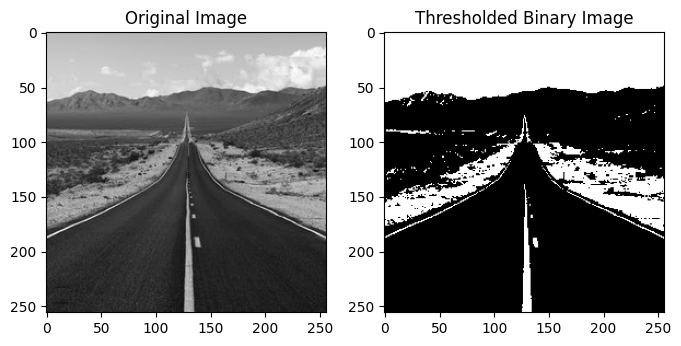

In [16]:
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(image, cmap='gray',  vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(binary, cmap='gray',  vmin=0, vmax=255)
ax2.title.set_text('Thresholded Binary Image')
plt.show()

3. ### Min-Max Contrast Stretching

image.min(): 87
image.max(): 139


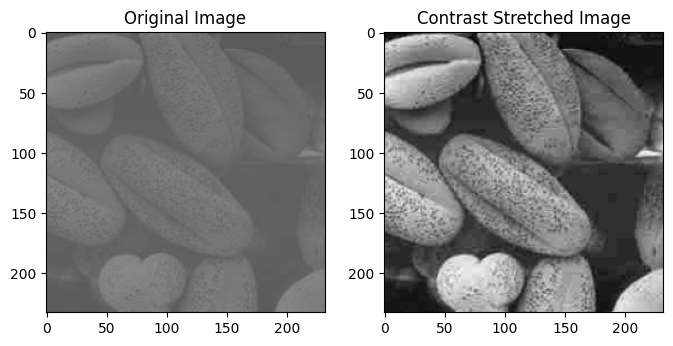

In [17]:
image = cv2.imread(imgdir+'/Low Contrast.PNG', cv2.IMREAD_GRAYSCALE)
r1, r2 = image.min(), image.max()
print('image.min():', r1)
print('image.max():', r2)
s1, s2 = 0, 255

# Apply the linear transformation using a for loop
output_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        output_image[i,j] = (image[i,j] - r1) * ((s2 - s1) / (r2 - r1)) + s1
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Contrast Stretched Image')
plt.show()

### Intensity Level Slicing
* Intensity level slicing involves highlighting a specific range of grey level in an image.

* **Case-I:**
1. To display a high value for all gray levels in the range of interest.
2. To display a low value for the rest of gray levels.

* **Case-II:**
1. Brighten the desired range of gray levels.
2. Preserve the rest of the intensity levels remain unchanged as same as the original gray levels.

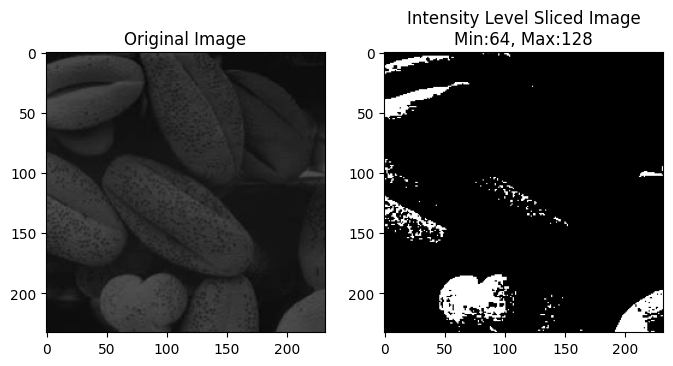

In [18]:
image = cv2.imread(imgdir+'/Dark.PNG', cv2.IMREAD_GRAYSCALE)
# Parameters
minimum_range = 64
maximum_range = 128
output_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j] > minimum_range and image[i,j] < maximum_range:
            output_image[i,j] = 255
        else:
            output_image[i,j] = 0 # image[i,j] for second case
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text(f'Intensity Level Sliced Image\nMin:{minimum_range}, Max:{maximum_range}')
plt.show()

# **Thank You :)**



# Transformation Table:
![](ss/Lab2.png)
